In [44]:
# !pip install numpy==1.21.0
# !pip install pandas==1.3.5
import pandas as pd
import os
%pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
import string
import re

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samrawit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/samrawit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/samrawit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /home/samrawit/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/samrawit/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [45]:
# all_data_path = '../data/raw_analyst_ratings.csv'
# # df = util.read_csv_file(all_data_path)
# # from scripts.utility import read_csv_file
import sys
# import os

# # Add the 'scripts' directory to the sys.path
# sys.path.append(os.path.abspath('../helper_func'))

# from helper_func.utility import read_csv_file  # Now this should work

# # from utils import read_csv_file

# df = read_csv_file(all_data_path)


import os

print(os.getcwd())

sys.path.append(os.path.abspath('../scripts'))

# Now import the utility module from scripts
from utility import read_csv_file, clean_text

all_data_path = '../data/raw_analyst_ratings.csv'
df = read_csv_file(all_data_path)

/home/samrawit/Kifya AIM/Challenge 1/NovaSentimentAnalytics/notebooks


In [46]:
df = df.get("data")
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [50]:
df.shape

(1407328, 5)

In [47]:
df.columns

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [48]:
df.isna().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [34]:



# headline_column = df['headline']
df['headlineClean'] = df['headline'].apply(clean_text)

df[['headline', 'headlineClean']]

,headline,headlineClean
0,Stocks That Hit 52-Week Highs On Friday,stock hit week
1,Stocks That Hit 52-Week Highs On Wednesday,stock hit week
2,71 Biggest Movers From Friday,biggest
3,46 Stocks Moving In Friday's Mid-Day Session,stock moving midday session
4,B of A Securities Maintains Neutral on Agilent...,neutral price target
...,...,...
1407323,Top Narrow Based Indexes For August 29,top narrow based august
1407324,Recap: Wednesday's Top Percentage Gainers and ...,recap top percentage
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,update color china auto initiation
1407326,Oppenheimer Initiates China Zenix At Outperfor...,china outperform


In [6]:
# 1. Descriptive statistics for headline lengths
df['headline_length'] = df['headline'].apply(len)
headline_stats = df['headline_length'].describe()
print("Headline Length Statistics:\n", headline_stats)

Headline Length Statistics:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [7]:
articles_per_publisher = df['publisher'].value_counts()
print("\nArticles Per Publisher:\n", articles_per_publisher)


Articles Per Publisher:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [8]:
# Ensure 'date' column is in datetime format before analyzing
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [9]:
articles_per_day = df['date'].dt.date.value_counts().sort_index()
print("\nArticles Per Day:\n", articles_per_day)



Articles Per Day:
 date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64


In [10]:
most_active_day = articles_per_day.idxmax()
most_active_day_count = articles_per_day.max()
print(f"\nMost Active Day: {most_active_day} with {most_active_day_count} articles")



Most Active Day: 2020-03-12 with 973 articles


In [11]:
monthly_articles = df['date'].dt.to_period('M').value_counts().sort_index()
print("\nArticles Per Month:\n", monthly_articles)


Articles Per Month:
 date
2011-04       6
2011-05      78
2011-06      96
2011-07     137
2011-08     149
           ... 
2020-02    2356
2020-03    4680
2020-04    4616
2020-05    9333
2020-06    5990
Freq: M, Name: count, Length: 111, dtype: int64


/tmp/ipykernel_21307/328822985.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_articles = df['date'].dt.to_period('M').value_counts().sort_index()


Note: you may need to restart the kernel to use updated packages.


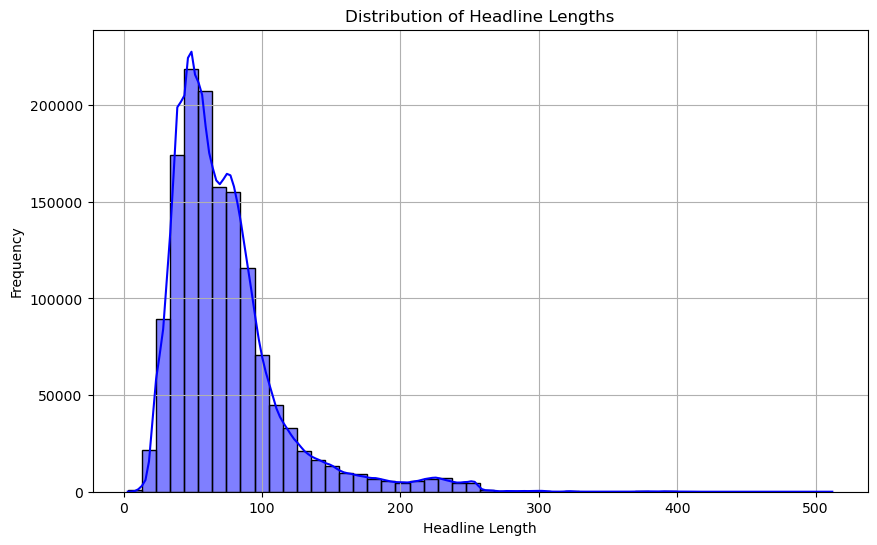

In [12]:
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# 1. Plot headline length distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], kde=True, color='blue', bins=50)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


/tmp/ipykernel_21307/85048985.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['date'].dt.to_period('M')


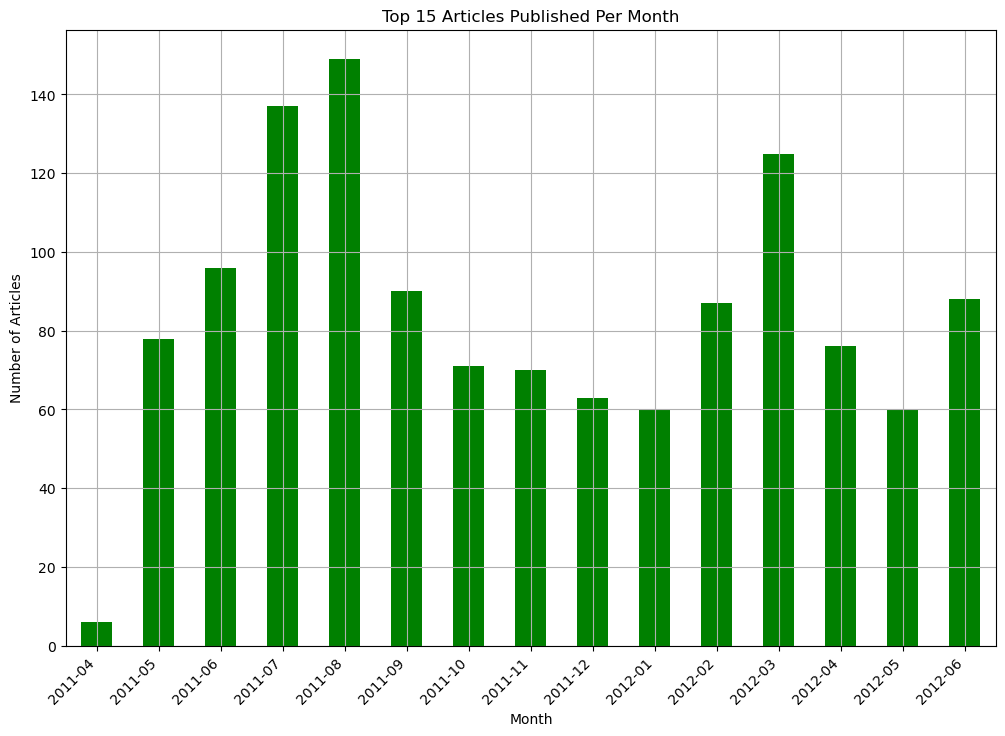

In [13]:
# 4. Plot articles per month (Bar Plot)
import matplotlib.pyplot as plt

# Step 1: Extract the month and year from the 'date' column (to group by month)
df['month'] = df['date'].dt.to_period('M')

# Step 2: Count the number of articles published each month
monthly_counts = df['month'].value_counts().sort_index()

# Step 3: Select the top 15 months (or all if you want to plot every month)
top_15_months = monthly_counts.head(15)

# Step 4: Plot the data
plt.figure(figsize=(12, 8))
top_15_months.plot(kind='bar', color='green')
plt.title('Top 15 Articles Published Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True)
plt.show()


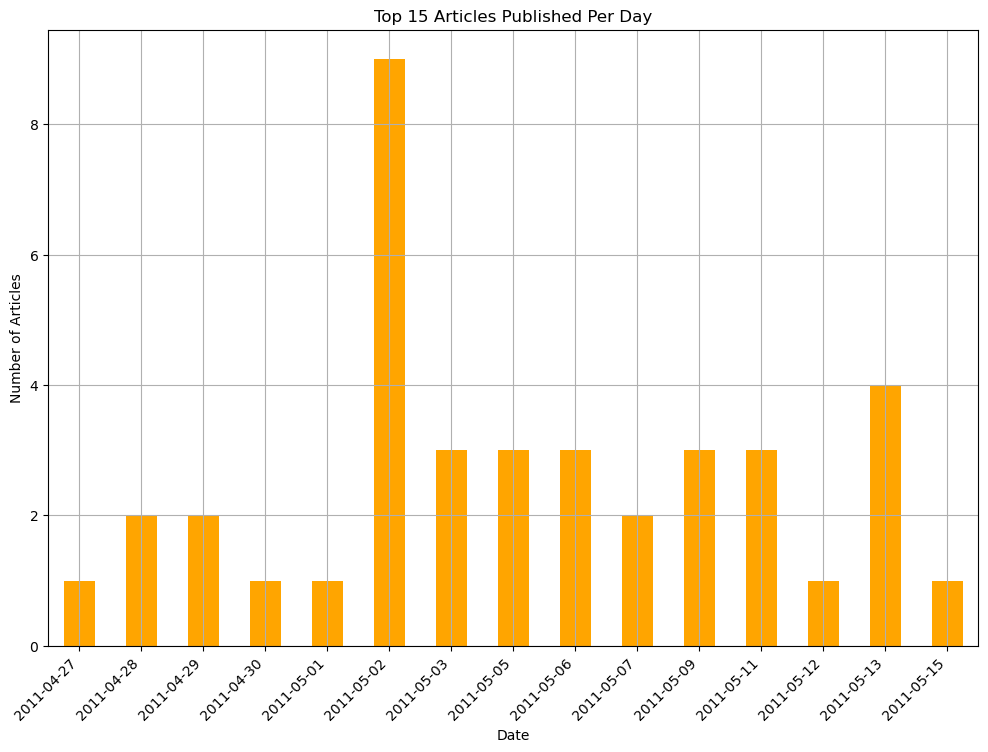

In [14]:
import matplotlib.pyplot as plt

# Step 1: Extract the date from the 'date' column (to group by day)
df['day'] = df['date'].dt.date

# Step 2: Count the number of articles published each day
daily_counts = df['day'].value_counts().sort_index()

# Step 3: Select the top 15 days (or all if you want to plot every day)
top_15_days = daily_counts.head(15)

# Step 4: Plot the data
plt.figure(figsize=(12, 8))
top_15_days.plot(kind='bar', color='orange')
plt.title('Top 15 Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True)
plt.show()


In [15]:
unique_publishers_count = df['publisher'].nunique()

In [16]:
unique_publishers_count

1034

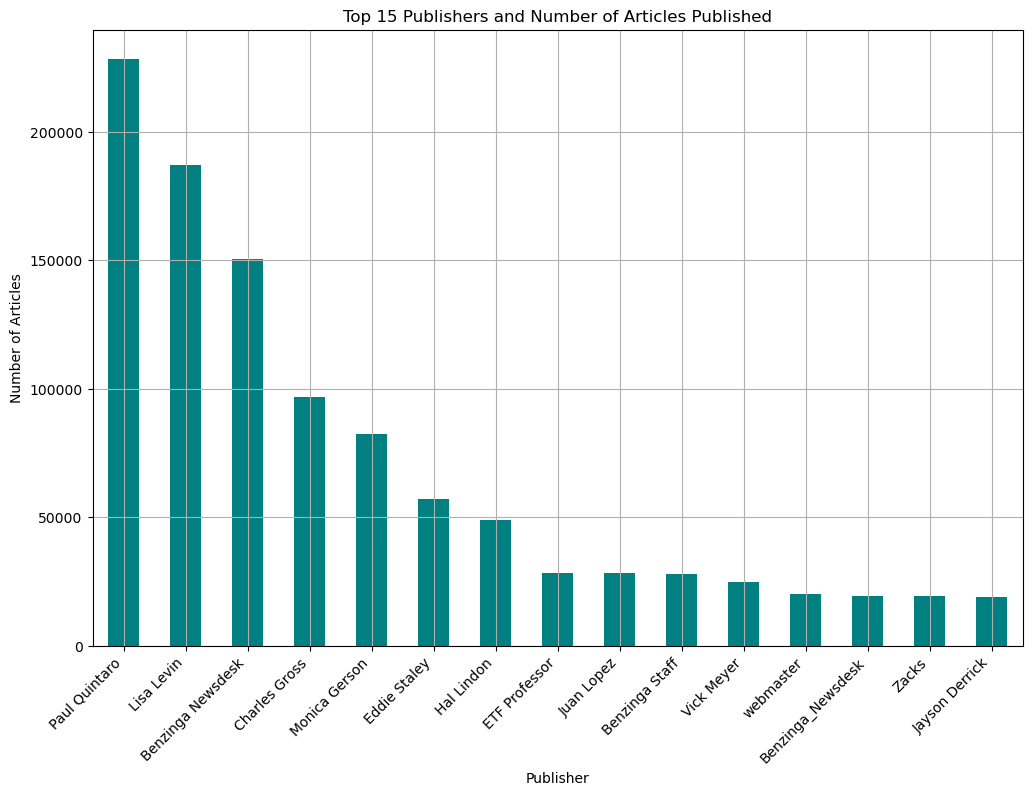

In [17]:
import matplotlib.pyplot as plt

# Step 1: Count the number of articles per publisher
articles_per_publisher = df['publisher'].value_counts()

# Step 2: Select the top 15 publishers
top_15_publishers = articles_per_publisher.head(15)

# Step 3: Plot the data
plt.figure(figsize=(12, 8))
top_15_publishers.plot(kind='bar', color='teal')
plt.title('Top 15 Publishers and Number of Articles Published')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True)
plt.show()


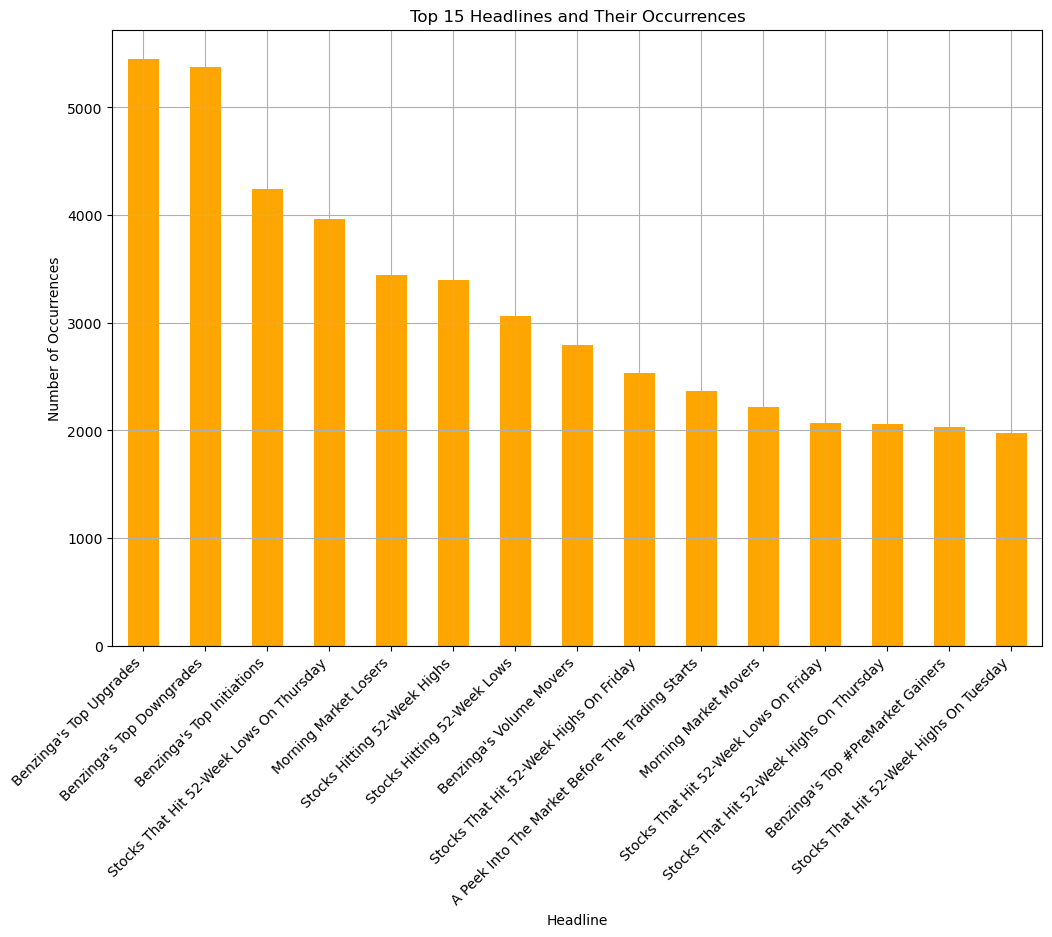

In [18]:
import matplotlib.pyplot as plt

# Step 1: Count the number of occurrences of each headline
headline_counts = df['headline'].value_counts()

# Step 2: Select the top 15 headlines
top_15_headlines = headline_counts.head(15)

# Step 3: Plot the data
plt.figure(figsize=(12, 8))
top_15_headlines.plot(kind='bar', color='orange')
plt.title('Top 15 Headlines and Their Occurrences')
plt.xlabel('Headline')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(True)
plt.show()


In [19]:
%pip install textblob joblib gensim 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 863.5 kB/s eta 0:00:00m eta 0:00:010:01:02
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mkl-fft 1.3.11 requires mkl, which is not installed.
blis 1.0.2 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [20]:
%pip install scikit-learn

from textblob import TextBlob
from joblib import Parallel, delayed
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Function for Sentiment Analysis using TextBlob
def get_sentiment(text):
    try:
        # Sentiment polarity: -1 (negative) to 1 (positive), categorize into positive, negative, neutral
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0:
            return 'positive'
        elif polarity < 0:
            return 'negative'
        else:
            return 'neutral'
    except Exception as e:
        return 'unknown'

# Function to perform sentiment analysis on the DataFrame in parallel
def sentiment_analysis_parallel(df, column):
    sentiments = Parallel(n_jobs=-1)(delayed(get_sentiment)(text) for text in df[column])
    return sentiments

In [22]:
# Apply parallel sentiment analysis
df['sentiment'] = sentiment_analysis_parallel(df, 'headlineClean')


In [23]:
sentiment_counts = df['sentiment'].value_counts()


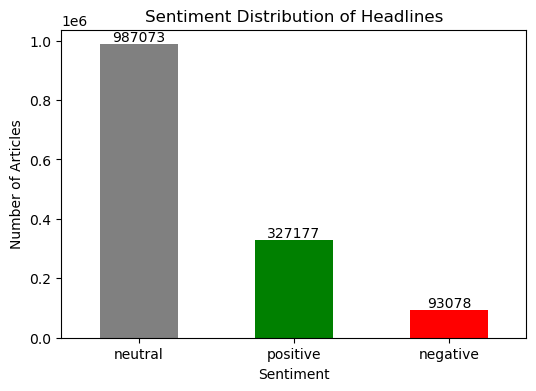

In [24]:
# Custom colors for each sentiment
colors = {'positive': 'green', 'negative': 'red', 'neutral': 'grey'}

# Plot the sentiment distribution
plt.figure(figsize=(6, 4))
ax = sentiment_counts.plot(kind='bar', color=[colors[sentiment] for sentiment in sentiment_counts.index])
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)

# Add the count above each bar
for i, count in enumerate(sentiment_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

In [25]:
# ----------- Topic Modeling (LDA) ------------
# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words('english'), max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['headlineClean'])


In [26]:
# Get the top keywords based on their TF-IDF scores
top_keywords = vectorizer.get_feature_names_out()

print("Top Keywords:", top_keywords)

Top Keywords: ['aal' 'aam' 'aba' ... 'zoom' 'zoster' 'zwanziger']


In [39]:
from sklearn.decomposition import LatentDirichletAllocation

# Fit the LDA model to find topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Print the topics and the top words associated with each topic
n_top_words = 10
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print([top_keywords[i] for i in topic.argsort()[:-n_top_words - 1:-1]])


In [57]:
# Step 5: Display the topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Print the top words for each topic
print_top_words(lda, feature_names, 10)

Topic #0:
earnings biggest week hit stock yesterday alert option outlook analyst
Topic #1:
top stock session moving revenue week new august midday set
Topic #2:
trading higher lower news deal several oil company update new
Topic #3:
buy target update price neutral coverage morgan market bank outperform
Topic #4:
watch estimate market may morning stock march beat yoy trade


In [58]:
# Display topics (top words in each topic)
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


Topic 0:
earnings biggest week hit stock yesterday alert option outlook analyst
Topic 1:
top stock session moving revenue week new august midday set
Topic 2:
trading higher lower news deal several oil company update new
Topic 3:
buy target update price neutral coverage morgan market bank outperform
Topic 4:
watch estimate market may morning stock march beat yoy trade


In [66]:
import spacy
from concurrent.futures import ThreadPoolExecutor
from sklearn.feature_extraction.text import TfidfVectorizer
%pip install rake_nltk
from rake_nltk import Rake
import pandas as pd

# Load the pre-trained spaCy model
nlp = spacy.load("en_core_web_sm")

  Using cached rake_nltk-1.0.6-py3-none-any.whl.metadata (6.4 kB)
Using cached rake_nltk-1.0.6-py3-none-any.whl (9.1 kB)
Note: you may need to restart the kernel to use updated packages.


Task 2 - starts here 

In [2]:

path = "../data/yfinance_data/"

# List of dataset file paths
dataset_files = ["AAPL_historical_data.csv", "AMZN_historical_data.csv", "GOOG_historical_data.csv", "META_historical_data.csv", "MSFT_historical_data.csv", "NVDA_historical_data.csv", "TSLA_historical_data.csv"]  # Add your dataset filenames here

# Corresponding variable names for each dataset
dataset_vars = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA", "TSLA"]

# Dictionary to store processed DataFrames
processed_data = {}

# Loop through each dataset
for file_name, var_name in zip(dataset_files, dataset_vars):
    # Load the dataset
    try:
        print(f"Processing {path + file_name}...")
        df = pd.read_csv(path + file_name)
        
        # Parse the Date column
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        
        # Drop rows with invalid or missing Date
        df.dropna(subset=['Date'], inplace=True)
        
        # Select relevant columns
        selected_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
        missing_columns = [col for col in selected_columns if col not in df.columns]
        
        if missing_columns:
            print(f"Warning: {file_name} is missing columns: {missing_columns}")
            continue  # Skip this dataset
        
        df = df[selected_columns]
        
        # Dynamically assign the DataFrame to a variable
        globals()[var_name] = df
        
        # Store the processed DataFrame in the dictionary for additional access
        processed_data[var_name] = df
        
        # Display the first 5 rows
        print(f"First 5 rows of {var_name}:")
        print(df.head())
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

# Example: Access the processed data for a specific file
# processed_data["AAPL_stock_data.csv"]


Processing ../data/yfinance_data/AAPL_historical_data.csv...
First 5 rows of AAPL:
        Date      Open      High       Low     Close  Adj Close     Volume
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600
Processing ../data/yfinance_data/AMZN_historical_data.csv...
First 5 rows of AMZN:
        Date      Open      High       Low     Close  Adj Close      Volume
0 1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000
1 1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000
2 1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000
3 1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000
4 19

Processed data for AAPL:
       Close    SMA_50  SMA_200        RSI      MACD  MACD_signal  MACD_hist
0   0.128348       NaN      NaN        NaN       NaN          NaN        NaN
1   0.121652       NaN      NaN        NaN       NaN          NaN        NaN
2   0.112723       NaN      NaN        NaN       NaN          NaN        NaN
3   0.115513       NaN      NaN        NaN       NaN          NaN        NaN
4   0.118862       NaN      NaN        NaN       NaN          NaN        NaN
..       ...       ...      ...        ...       ...          ...        ...
95  0.126674  0.115513      NaN  57.303047  0.003122     0.002714   0.000408
96  0.126674  0.115759      NaN  57.303047  0.003071     0.002785   0.000286
97  0.126116  0.116116      NaN  56.407949  0.002951     0.002818   0.000133
98  0.125558  0.116429      NaN  55.474778  0.002779     0.002810  -0.000031
99  0.122210  0.116752      NaN  50.117378  0.002346     0.002717  -0.000372

[100 rows x 7 columns]
            Close      SMA_

/tmp/ipykernel_299076/2077950616.py:77: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


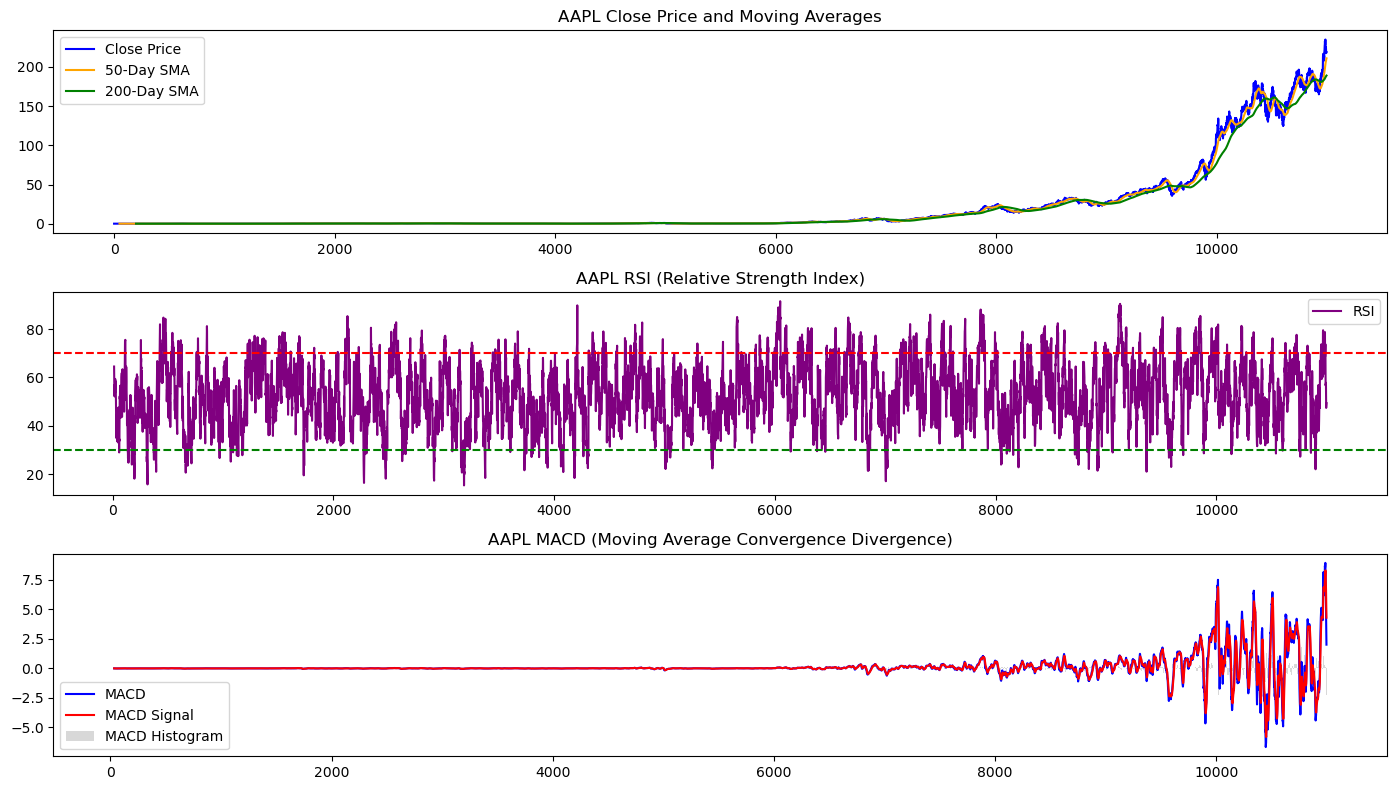

Processed data for AMZN:
       Close    SMA_50  SMA_200        RSI      MACD  MACD_signal  MACD_hist
0   0.097917       NaN      NaN        NaN       NaN          NaN        NaN
1   0.086458       NaN      NaN        NaN       NaN          NaN        NaN
2   0.085417       NaN      NaN        NaN       NaN          NaN        NaN
3   0.081771       NaN      NaN        NaN       NaN          NaN        NaN
4   0.071354       NaN      NaN        NaN       NaN          NaN        NaN
..       ...       ...      ...        ...       ...          ...        ...
95  0.216927  0.138766      NaN  66.097592  0.024114     0.022188   0.001926
96  0.201042  0.140651      NaN  59.383981  0.022642     0.022279   0.000363
97  0.200521  0.142370      NaN  59.171700  0.021189     0.022061  -0.000872
98  0.200781  0.144125      NaN  59.249988  0.019829     0.021615  -0.001785
99  0.206250  0.146021      NaN  60.946345  0.018975     0.021087  -0.002112

[100 rows x 7 columns]
           Close      SMA_5

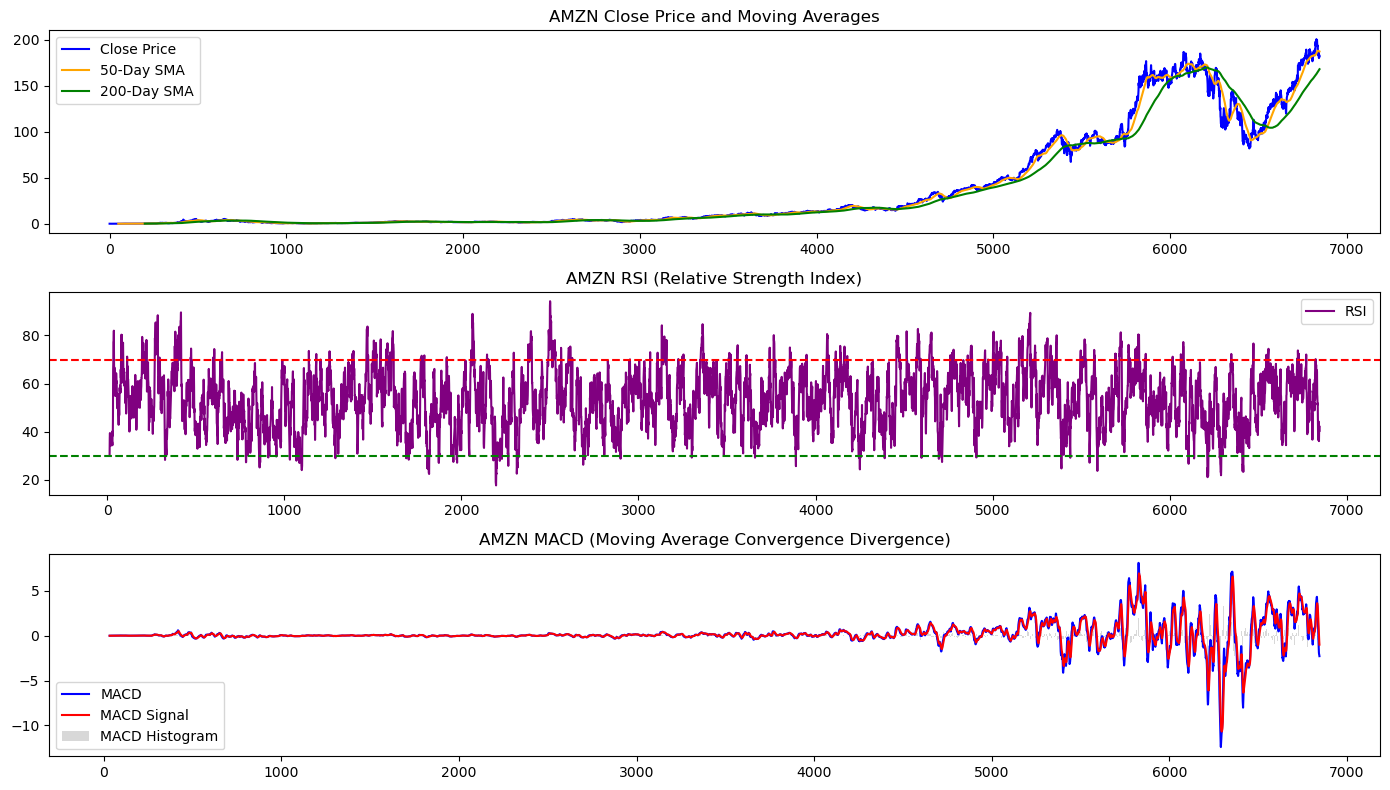

Processed data for GOOG:
       Close    SMA_50  SMA_200        RSI      MACD  MACD_signal  MACD_hist
0   2.499133       NaN      NaN        NaN       NaN          NaN        NaN
1   2.697639       NaN      NaN        NaN       NaN          NaN        NaN
2   2.724787       NaN      NaN        NaN       NaN          NaN        NaN
3   2.611960       NaN      NaN        NaN       NaN          NaN        NaN
4   2.640104       NaN      NaN        NaN       NaN          NaN        NaN
..       ...       ...      ...        ...       ...          ...        ...
95  4.844342  4.514409      NaN  59.623695  0.154946     0.126319   0.028627
96  4.819685  4.517452      NaN  58.509270  0.148270     0.130709   0.017561
97  4.696148  4.520815      NaN  53.149253  0.131495     0.130866   0.000628
98  4.828153  4.524740      NaN  57.617215  0.127384     0.130170  -0.002786
99  4.858290  4.525617      NaN  58.588198  0.125115     0.129159  -0.004044

[100 rows x 7 columns]
           Close    SMA_50 

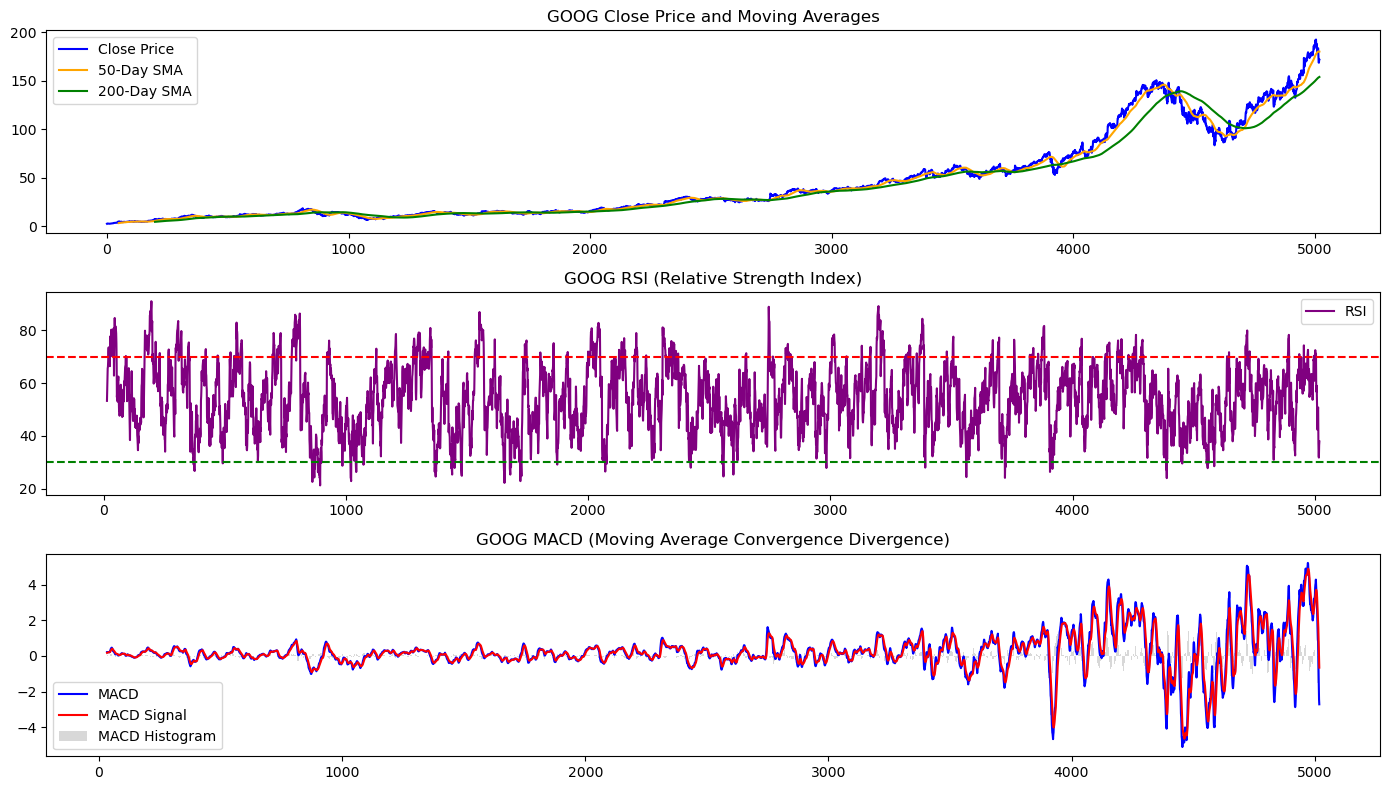

Processed data for META:
        Close   SMA_50  SMA_200        RSI      MACD  MACD_signal  MACD_hist
0   27.580000      NaN      NaN        NaN       NaN          NaN        NaN
1   28.240000      NaN      NaN        NaN       NaN          NaN        NaN
2   26.809999      NaN      NaN        NaN       NaN          NaN        NaN
3   26.750000      NaN      NaN        NaN       NaN          NaN        NaN
4   27.709999      NaN      NaN        NaN       NaN          NaN        NaN
..        ...      ...      ...        ...       ...          ...        ...
95  27.430000  26.8118      NaN  56.603142  0.067236    -0.091524   0.158760
96  28.969999  26.8220      NaN  66.383961  0.236299    -0.025960   0.262258
97  28.309999  26.8426      NaN  60.129204  0.313413     0.041915   0.271498
98  27.570000  26.8514      NaN  53.987194  0.311227     0.095777   0.215450
99  26.889999  26.8438      NaN  49.030900  0.251723     0.126966   0.124756

[100 rows x 7 columns]
           Close      SMA_5

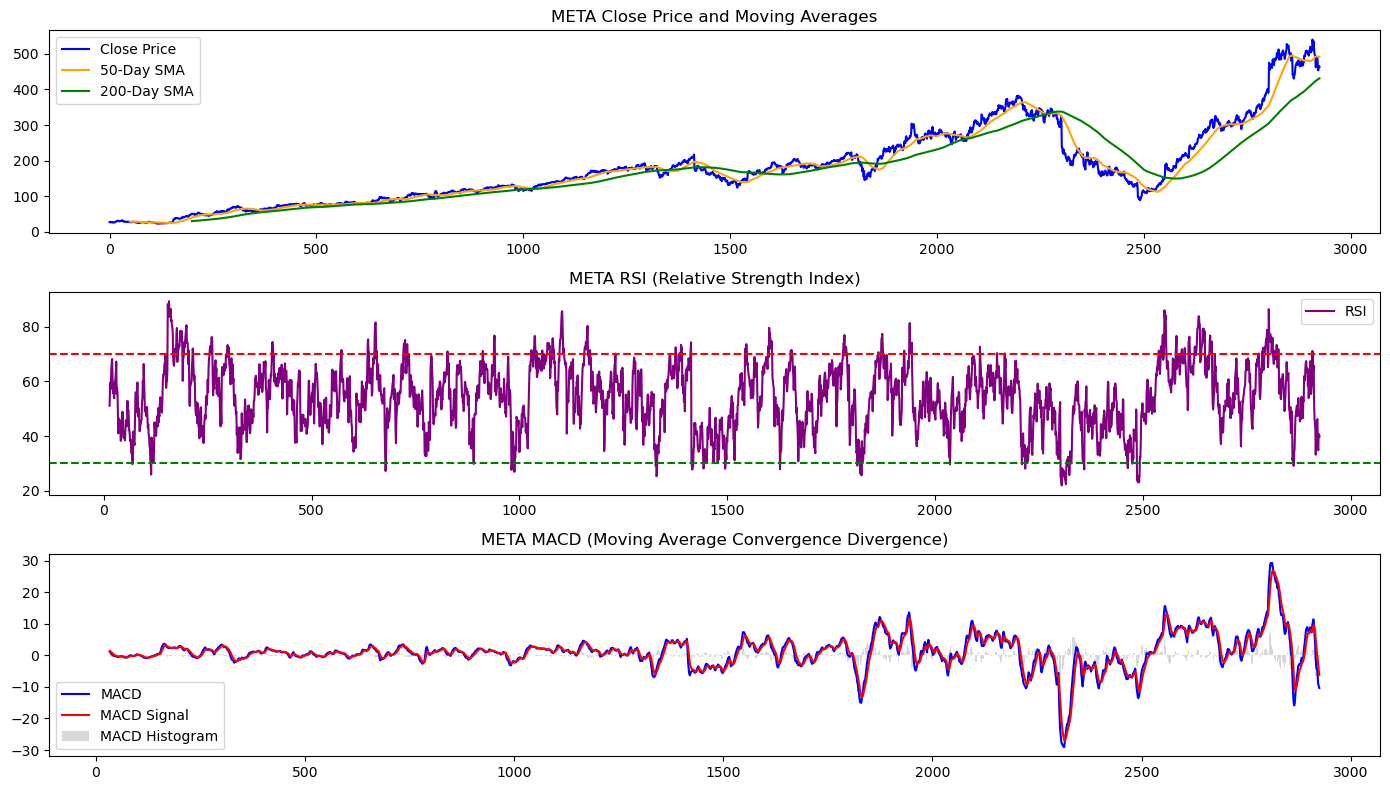

Processed data for MSFT:
       Close    SMA_50  SMA_200        RSI      MACD  MACD_signal  MACD_hist
0   0.097222       NaN      NaN        NaN       NaN          NaN        NaN
1   0.100694       NaN      NaN        NaN       NaN          NaN        NaN
2   0.102431       NaN      NaN        NaN       NaN          NaN        NaN
3   0.099826       NaN      NaN        NaN       NaN          NaN        NaN
4   0.098090       NaN      NaN        NaN       NaN          NaN        NaN
..       ...       ...      ...        ...       ...          ...        ...
95  0.103299  0.108021      NaN  47.227104 -0.000394    -0.001243   0.000849
96  0.099826  0.107813      NaN  41.810603 -0.000723    -0.001139   0.000416
97  0.098958  0.107604      NaN  40.558586 -0.001042    -0.001120   0.000077
98  0.098090  0.107413      NaN  39.291497 -0.001350    -0.001166  -0.000184
99  0.098090  0.107222      NaN  39.291497 -0.001575    -0.001248  -0.000327

[100 rows x 7 columns]
           Close      SMA_5

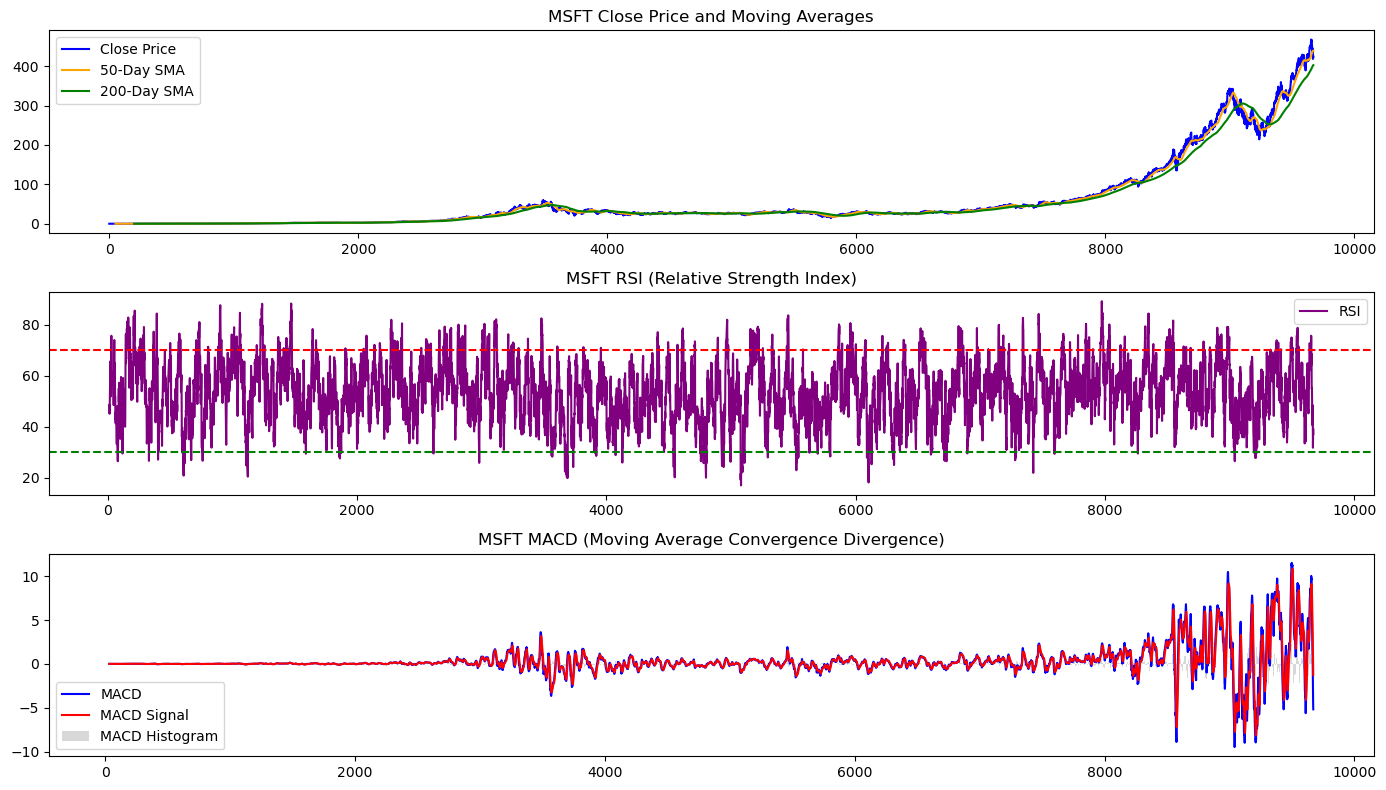

Processed data for NVDA:
       Close    SMA_50  SMA_200        RSI      MACD  MACD_signal  MACD_hist
0   0.041016       NaN      NaN        NaN       NaN          NaN        NaN
1   0.045313       NaN      NaN        NaN       NaN          NaN        NaN
2   0.041797       NaN      NaN        NaN       NaN          NaN        NaN
3   0.041667       NaN      NaN        NaN       NaN          NaN        NaN
4   0.041536       NaN      NaN        NaN       NaN          NaN        NaN
..       ...       ...      ...        ...       ...          ...        ...
95  0.037500  0.038322      NaN  52.576053 -0.000599    -0.000837   0.000238
96  0.037630  0.038251      NaN  53.112874 -0.000445    -0.000758   0.000313
97  0.036849  0.038108      NaN  49.488476 -0.000382    -0.000683   0.000301
98  0.035417  0.037962      NaN  43.611985 -0.000442    -0.000635   0.000193
99  0.035417  0.037842      NaN  43.611985 -0.000484    -0.000605   0.000120

[100 rows x 7 columns]
           Close     SMA_50

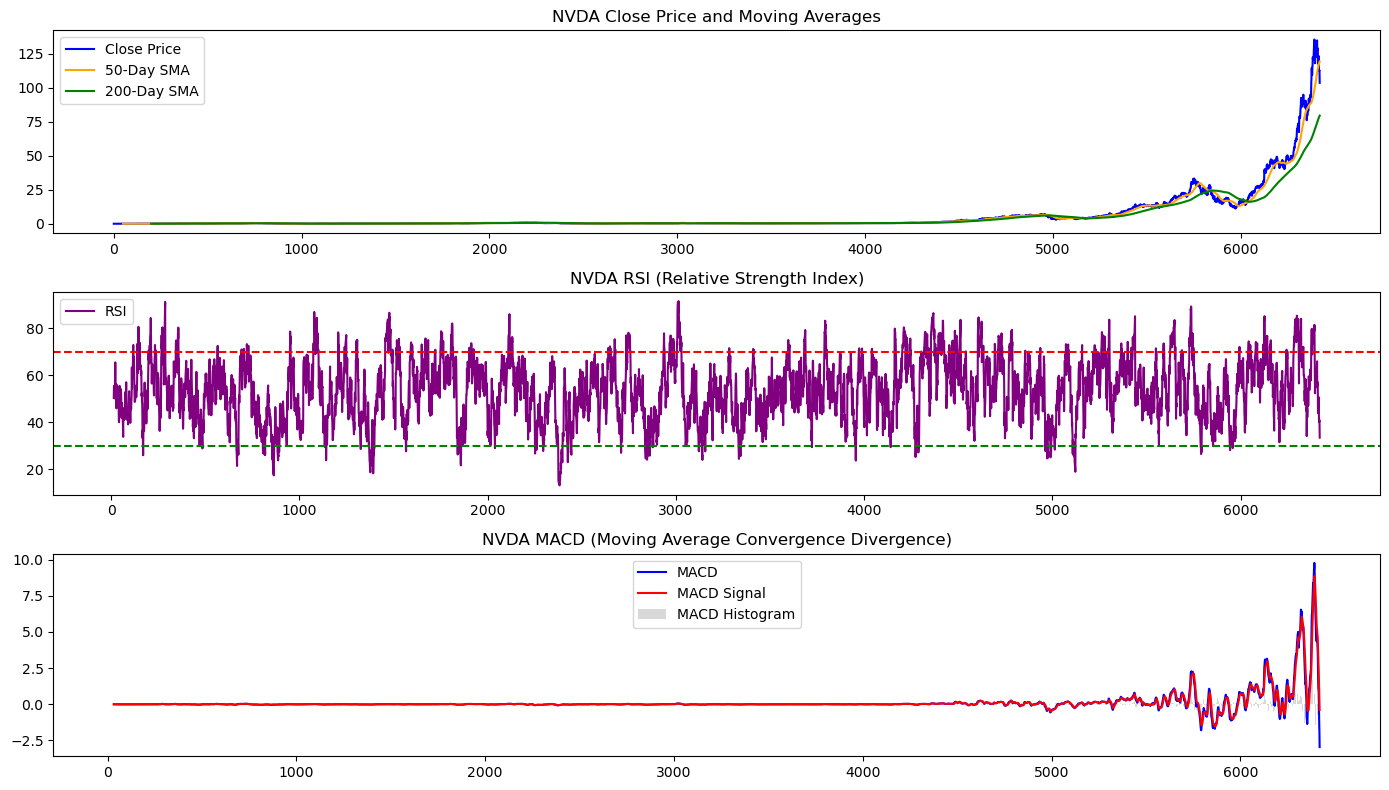

In [40]:
import talib
import pandas as pd
import matplotlib.pyplot as plt



# List of stock symbols
stocks = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]

# List of indicators to calculate
indicators = {
    'SMA_50': {'function': talib.SMA, 'args': {'timeperiod': 50}},
    'SMA_200': {'function': talib.SMA, 'args': {'timeperiod': 200}},
    'RSI': {'function': talib.RSI, 'args': {'timeperiod': 14}},
    'MACD': {'function': talib.MACD, 'args': {'fastperiod': 12, 'slowperiod': 26, 'signalperiod': 9}},
}

# Process each stock's data
for var_name in stocks:
    df = processed_data[var_name]  # Retrieve the stock's dataframe from processed_data
    
    # Convert the 'Close' column to numpy array
    close_prices = df['Close'].values  # TA-Lib needs numpy arrays, not pandas series
    
    # Apply each indicator
    for indicator_name, indicator in indicators.items():
        func = indicator['function']
        args = indicator['args']
        
        # Calculate the indicator
        if indicator_name == 'MACD':
            # MACD returns three values: MACD line, MACD Signal, MACD Histogram
            macd, macd_signal, macd_hist = func(close_prices, **args)
            df['MACD'] = pd.Series(macd, index=df.index)
            df['MACD_signal'] = pd.Series(macd_signal, index=df.index)
            df['MACD_hist'] = pd.Series(macd_hist, index=df.index)
    
        else:
            # For SMA and RSI, they return a single value
            df[indicator_name] = func(close_prices, **args)
    
    # Display the first and last few rows for verification
    print(f"Processed data for {var_name}:")
    print(df[['Close', 'SMA_50', 'SMA_200', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].head())

    print(df[['Close', 'SMA_50', 'SMA_200', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].tail())

    # Plotting for each stock (AAPL, AMZN, GOOG, META, MSFT, NVDA)
    plt.figure(figsize=(14, 8))

    # Plot Closing Price, SMA50, and SMA200
    plt.subplot(3, 1, 1)
    plt.plot(df['Close'], label='Close Price', color='blue')
    plt.plot(df['SMA_50'], label='50-Day SMA', color='orange')
    plt.plot(df['SMA_200'], label='200-Day SMA', color='green')
    plt.title(f'{var_name} Close Price and Moving Averages')
    plt.legend()

    # Plot RSI
    plt.subplot(3, 1, 2)
    plt.plot(df['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title(f'{var_name} RSI (Relative Strength Index)')
    plt.legend()

    # Plot MACD
    plt.subplot(3, 1, 3)
    plt.plot(df['MACD'], label='MACD', color='blue')
    plt.plot(df['MACD_signal'], label='MACD Signal', color='red')
    plt.bar(df.index, df['MACD_hist'], label='MACD Histogram', color='gray', alpha=0.3)
    plt.title(f'{var_name} MACD (Moving Average Convergence Divergence)')
    plt.legend()

    # Display the plots
    plt.tight_layout()
    plt.show()
